In [3]:
from itertools import product
from random import randrange

import pandas
from hsa.v_keras.memories import load_memories
from hsa.v_keras.model_zoo import make_2_hidden_wide_beginning_stable, first_unstable

# parameters
from hsa.v_keras.qlearning4k import ExperienceReplay

nb_frames = 1
ram_size = 2048
nr_actions = 36
batch_size = 128
nr_epoch = 30
memories_filename = "mario_1_1_third.hdf"

memory = ExperienceReplay(memory_size=50000)
load_memories(memory, memories_filename)

example_model = first_unstable(nb_frames=nb_frames, ram_size=ram_size, nr_actions=nr_actions)
batch = memory.get_batch(model=example_model, batch_size=batch_size, gamma=0.9)


def test_hyperparameters(learning_rate, learning_rate_decay):
    model = first_unstable(learning_rate, learning_rate_decay, nb_frames, ram_size, nr_actions)

    inputs, targets = batch
    scores = [float(model.train_on_batch(inputs, targets)) for i in range(20)]
    print("{},{}".format(learning_rates, learning_rate_decay))
    return scores

rates [1e-06]; decays [0]


[1e-06],0


In [23]:
%matplotlib inline

In [4]:
scores

{(1e-06, 0): [17645.837890625,
  4666.19580078125,
  3654.719970703125,
  3667.091796875,
  2799.00341796875,
  2422.2841796875,
  2322.030029296875,
  2247.357177734375,
  2143.97998046875,
  2019.94140625]}

In [ ]:
from itertools import islice

learning_rates = (10 ** -random_int for random_int in randrange(-10, 11))
decays = (0.1 * random_int for random_int in randrange(0, 11))
# learning_rates = [10 ** i for i in range(3, 11)]
# decays = [i * 0.1 for i in range(0, 11)]
variable_space = islice(zip(learning_rates, decays), 20)
print("rates {}; decays {}".format(learning_rates, decays))

scores = {(rate, decay): test_hyperparameters(rate, decay) for (rate, decay) in variable_space}

In [13]:
score_df = pandas.DataFrame.from_dict(scores,orient='index')
score_df

,0,1,2,3,4,5,6,7,8,9
"(1e-06, 0)",17645.837891,4666.195801,3654.719971,3667.091797,2799.003418,2422.28418,2322.030029,2247.357178,2143.97998,2019.941406


In [16]:
score_df.to_csv("scores.csv")

In [17]:
ran_scores= pandas.DataFrame.from_csv("hsa/scores1475846849.081919.csv")

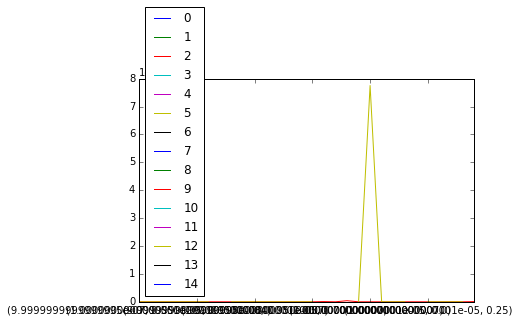

In [25]:
ran_scores.plot()